In [1]:
import re

import numpy as np
import tensorflow as tf

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
classes = ["i", "ii", "iii", "iv", "v", "vi", "vii", "viii", "ix", "x"]

In [3]:
prediction_path = "../predictions/data-val.npz"
loaded_file = np.load(prediction_path)
output = loaded_file["output"]
y_true = np.array(output[:,0], dtype=int)
y_pred = np.array(output[:,1], dtype=int)
y_proba = output[:,2:]

In [4]:
np.set_printoptions(formatter={'float_kind':"{:.3f}".format})
y_proba

array([[0.991, 0.002, 0.000, ..., 0.000, 0.001, 0.002],
       [0.539, 0.036, 0.115, ..., 0.004, 0.128, 0.059],
       [0.852, 0.075, 0.009, ..., 0.000, 0.001, 0.009],
       ...,
       [0.022, 0.060, 0.051, ..., 0.006, 0.030, 0.818],
       [0.056, 0.025, 0.007, ..., 0.001, 0.307, 0.536],
       [0.001, 0.000, 0.000, ..., 0.000, 0.006, 0.974]])

In [5]:
accuracy = (y_true == y_pred).sum() / len(y_true)
accuracy

0.6740467404674046

In [6]:
with open(prediction_path+"-image-paths.txt", "r") as fp:
    image_paths = [l.strip() for l in fp.readlines()]

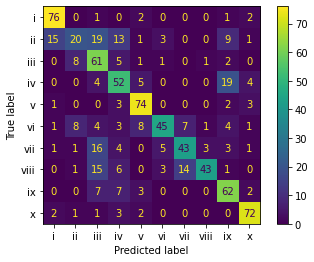

In [7]:
cm = confusion_matrix(y_true=y_true, y_pred=y_pred)
cm_display = ConfusionMatrixDisplay(cm, display_labels=classes).plot()